---
title: Piecewise Interpolation
venue: Modules
---

## 1D Linear Piecewise Interpolation

Given a set of points $(x_i,y_i)$, piecewise linear interpolation simply connects the neighboring two points via a straight line segment. The unknown function values $y(x)$ at $x$ within $(x_i,x_{i+1})$ are approximated by the values $\tilde{y}(x)$ on the line as shown in [Equation (%s)](#equ-1dlerp):

$$
\label{equ-1dlerp}
\begin{equation}
  y(x)\approx \tilde{y}(x) =
  y_i + \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) \quad 
  \text{ for } x\in[x_i,x_{i+1}]
\end{equation}
$$

The [Interpolations package]( https://juliamath.github.io/Interpolations.jl/stable/) contains implemetations for different spline types. 

We can generate a piecewise linear interpolation using this package's in-built routines. 

**Example**

For $y(x)=e^x$, generate 6 equidistant points $(x_1=0,\dots,x_6=2)$ with grid size $h=0.4$ within $[0,2]$, and evaluate $y_i=y(x_i)$. Then we can see these points $(x_i,y_i), i=1,\dots,6$ to interpolate the values on all remaining poinits in $[0,2]$.

In [19]:
import PlotlyLight as plt
plt.preset.template.plotly_dark!()

# Generate 6 points used for interpolation of y(x)=e^(x)
xs = range(0, 2.0, step=0.4)
A = exp.(xs);

# Plot points
p = plt.plot(
    x = xs,
    y = A,
    type = "scatter",
    mode = "markers",
    name = "y = exp(x)"
)

p.layout.title.text = "y vs. x"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.yaxis.title.text = "y"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], :y => [1.0, 1.4918246976412703, 2.225540928492468, 3.3201169227365472, 4.953032424395115, 7.38905609893065], :mode => "markers", :name => "y = exp(x)")], EasyConfig.Config(:title => EasyConfig.Config(:text => "y vs. x", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x")), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"))), EasyConfig.Config())

Now generate the linear interpolation with the in-built routine from the Interpolation package for these 6 points. Check that the interpolated value equals the exact one at one of these points, namely $(1.2, e^{1.2} )$:

In [11]:
import Interpolations as interps
using Printf

# Create linear interpolation object from previous 6 points
linear_interp = interps.linear_interpolation(xs, A);

# Evaluate exact value at known point x=1.2 using printf macro
@printf "Interpolated value at x=1.2 is %0.10f, exact function value is %0.10f" linear_interp(1.2) exp(1.2)

Interpolated value at x=1.2 is 3.3201169227, exact function value is 3.3201169227

Now compare the interpolated value with the exact one at a new point within the interval $[0, 2]$, namely $x=1.13$:

In [12]:
# Evaluate exact value at new point using printf macro
@printf "Interpolated value at x=1.13 is %0.10f, exact function value is %0.10f" linear_interp(1.13) exp(1.13)

Interpolated value at x=1.13 is 3.1285661237, exact function value is 3.0956565001

Now evaluate a point $x=2.1$ outside the interval $[0,2]$:

Extrapolation is needed for evaluation outside the original domain $[0,2]$:

In [16]:
# Create linear interpolation object with additional extrapolation
linear_extrap = interps.linear_interpolation(xs, A, extrapolation_bc=interps.Line()) 
@printf "Extrapolated value at x=2.1 is %0.10f, exact function value is %0.10f" linear_extrap(2.1) exp(2.1)

Extrapolated value at x=2.1 is 7.9980620176, exact function value is 8.1661699126

Compare interpolation with exact values:

In [21]:
# Create fine grid with smaller stepsize 0.02 compared to original 0.4 used for interpolation
xf = range(0.0, 2.0, step=0.02)

# Evaluate values on finer grid using linear interpolation from coarser grid
y_interpolated = linear_interp.(xf);
y_exact = exp.(xf);

# Original points on coarse grids used for interpolation
p = plt.plot(
    x = xs,
    y = A,
    type = "scatter",
    mode = "markers",
    name = "Original points"
).plot(
    x = xf,
    y = y_interpolated,
    type = "scatter",
    mode = "lines",
    name = "Interpolated curve"
).plot(
    x = xf,
    y = exp.(xf),
    type = "scatter",
    mode = "lines",
    name = "Exact curve"
)

p.layout.title.text = "y vs. x"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.yaxis.title.text = "y"

display(p)


PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], :y => [1.0, 1.4918246976412703, 2.225540928492468, 3.3201169227365472, 4.953032424395115, 7.38905609893065], :mode => "markers", :name => "Original points"), EasyConfig.Config(:type => "scatter", :x => [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0], :y => [1.0, 1.0245912348820636, 1.049182469764127, 1.0737737046461906, 1.098364939528254, 1.1229561744103176, 1.1475474092923812, 1.1721386441744448, 1.196729879056508, 1.2213211139385716  …  6.292845445389659, 6.414646629116435, 6.536447812843214, 6.658248996569988, 6.780050180296764, 6.901851364023543, 7.023652547750319, 7.145453731477096, 7.267254915203872, 7.38905609893065], :mode => "lines", :name => "Interpolated curve"), EasyConfig.Config(:type => "scatter", :x => [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0], :y => [1.0, 1.0202013400267558, 1.0408107741923882, 1.0618365465453596, 1.0832870676749586, 1.1051709180756477, 1.1274968515793757, 1.1502737988572274, 1.1735108709918103, 1.1972173631218102  …  6.171858449883554, 6.296538261026657, 6.423736771429135, 6.553504862191148, 6.6858944422792685, 6.8209584692907494, 6.958750970637272, 7.099327065156633, 7.242742985161012, 7.38905609893065], :mode => "lines", :name => "Exact curve")], EasyConfig.Config(:title => EasyConfig.Config(:text => "y vs. x", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x")), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"))), EasyConfig.Config())

# Higher order spline interpolations: Cubic

In [22]:
# Generate cubic spline object from the same 6 points
cubic_interp = interps.cubic_spline_interpolation(xs, A)

# Make cubic interpolation for points on finer grid
y_cubic = cubic_interp.(xf)

# Original points on coarse grids used for interpolation
p = plt.plot(
    x = xs,
    y = A,
    type = "scatter",
    mode = "markers",
    name = "Original points"
).plot(
    x = xf,
    y = y_interpolated,
    type = "scatter",
    mode = "lines",
    name = "Linear"
).plot(
    x = xf,
    y = y_cubic,
    type = "scatter",
    mode = "lines",
    name = "Cubic"
).plot(
    x = xf,
    y = exp.(xf),
    type = "scatter",
    mode = "lines",
    name = "Exact curve"
)

p.layout.title.text = "y vs. x"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "x"
p.layout.yaxis.title.text = "y"

display(p)

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [0.0, 0.4, 0.8, 1.2, 1.6, 2.0], :y => [1.0, 1.4918246976412703, 2.225540928492468, 3.3201169227365472, 4.953032424395115, 7.38905609893065], :mode => "markers", :name => "Original points"), EasyConfig.Config(:type => "scatter", :x => [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0], :y => [1.0, 1.0245912348820636, 1.049182469764127, 1.0737737046461906, 1.098364939528254, 1.1229561744103176, 1.1475474092923812, 1.1721386441744448, 1.196729879056508, 1.2213211139385716  …  6.292845445389659, 6.414646629116435, 6.536447812843214, 6.658248996569988, 6.780050180296764, 6.901851364023543, 7.023652547750319, 7.145453731477096, 7.267254915203872, 7.38905609893065], :mode => "lines", :name => "Linear"), EasyConfig.Config(:type => "scatter", :x => [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0], :y => [1.0, 1.0223281796027621, 1.0446903901119802, 1.067120662434109, 1.089653027475605, 1.1123215161429238, 1.1351601593425211, 1.1582029879808522, 1.1814840329643728, 1.2050373251995388  …  6.227422854691919, 6.353394130406744, 6.480459200741386, 6.608481341368363, 6.737323827960205, 6.866849936189434, 6.9969229417285685, 7.127406120250134, 7.258162747426652, 7.38905609893065], :mode => "lines", :name => "Cubic"), EasyConfig.Config(:type => "scatter", :x => [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0], :y => [1.0, 1.0202013400267558, 1.0408107741923882, 1.0618365465453596, 1.0832870676749586, 1.1051709180756477, 1.1274968515793757, 1.1502737988572274, 1.1735108709918103, 1.1972173631218102  …  6.171858449883554, 6.296538261026657, 6.423736771429135, 6.553504862191148, 6.6858944422792685, 6.8209584692907494, 6.958750970637272, 7.099327065156633, 7.242742985161012, 7.38905609893065], :mode => "lines", :name => "Exact curve")], EasyConfig.Config(:title => EasyConfig.Config(:text => "y vs. x", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "x")), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "y"))), EasyConfig.Config())

# In-class exercise

The following are exercises 3,4 from chapter 5.3 of the [book homepage](https://tobydriscoll.net/fnc-julia/localapprox/splines.html). You should use the interpolation routine from the Interpolations package rather than implement your own as shown in the book.

**Task 1**

For the two functions $y_1,y_2$, intervals, and values of $n$ as specified below, define evenly spaced $n+1$ nodes. Then use the previous linear and cubic spline routines from the Interpolations package to plot the linear and cubic spline interpolant using those nodes, together with the exact function values over the given interval. Make one separate plot for each function.

$$
\begin{equation*}
\begin{align}
  y_1(x) &= \cos(\pi x^2),\; x \in I = [0,\;4],\; n=18 \\
  y_2(x) &= \sin(1/x),\; x \in I = [0.5,\;7],\; n=9
\end{align}
\end{equation*}
$$

What can you observe?

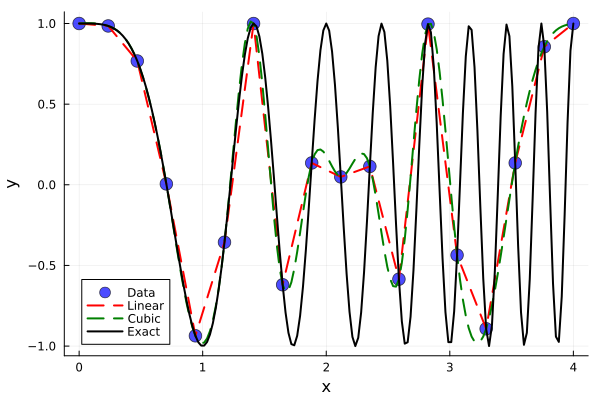

In [23]:
# Packages used
import Plots as Plt
import Interpolations as interps

function fast_cos(n::Real)
    # Check that data points is positive
    if !(n > 0)
        throw(ArgumentError("n must be > 0"))
    end

    # Generate 6 points used for interpolation of y(x) = cos(π x^2)
    x_start = 0
    x_stop = 4
    x_step = (x_stop - x_start) / (n - 1)

    xs = x_start:x_step:x_stop
    A = cos.(π * xs.^2)

    # Create linear interpolation object from the previous points
    linear_interp = interps.linear_interpolation(xs, A)
    
    # Create cubic spline object from the same previous points
    cubic_interp = interps.cubic_spline_interpolation(xs, A)
    
    # Create a fine grid with a smaller stepsize
    x_step_f = 0.1 * x_step
    xf = x_start:x_step_f:x_stop
    
    # Evaluate values on finer grid using interpolation from coarser grid
    y_interpolated = linear_interp.(xf)
    y_cubic = cubic_interp.(xf)
    y_exact = cos.(π * xf.^2)
    
    # Plots
    Plt.scatter(xs, A, label="Data", mc=:blue, ms=7, ma=0.7)
    Plt.plot!(xf, y_interpolated, label="Linear", lc=:red, lw=2, ls=:dash)
    Plt.plot!(xf, y_cubic, label="Cubic", lc=:green, lw=2, ls=:dash)
    Plt.plot!(xf, y_exact, label="Exact", lc=:black, lw=2, ls=:solid)
    Plt.xlabel!("x")
    Plt.ylabel!("y")
end

fast_cos(18)

As the frequency of the exact function increases, the interpolant based on an equidistant grid fails to accurately represent the underlying. The original function is under sampled.

For this fixed interval, there are four cycles between $x=3$ and $x=4$. So the sampling speed would need to be at least twice as fast. Specifically $f_s \geq 8$ and since there are four cycles then $n \geq 32$. For conservatism doubling this and setting $n = 64$ produces a more acceptable interpolant.

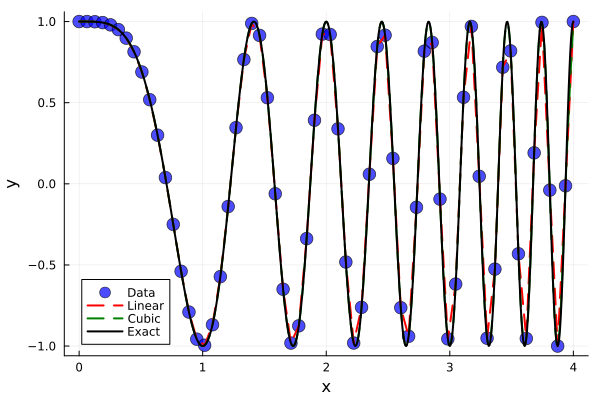

In [24]:
fast_cos(64)

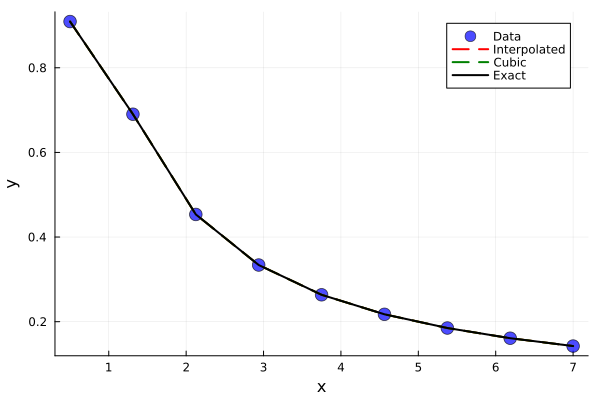

In [27]:
# Packages used
import Interpolations as interps
import Plots as Plt

# Generate 6 points used for interpolation of y(x) = sin(1 / x)
x_start = 0.5
x_stop = 7
n = 9
x_step = (x_stop - x_start) / (n - 1)

xs = x_start:x_step:x_stop
A = sin.(1 ./ xs)

# Create linear interpolation object from the previous points
linear_interp = interps.linear_interpolation(xs, A)

# Create cubic spline object from the same previous points
cubic_interp = interps.cubic_spline_interpolation(xs, A)

# Create a fine grid with a smaller stepsize
x_step_f = 0.1 * x_step
xf = range(x_start, x_stop, step=x_step)

# Evaluate values on finer grid using interpolation from coarser grid
y_interpolated = linear_interp.(xf)
y_cubic = cubic_interp.(xf)
y_exact = sin.(1 ./ xf)

# Plots
Plt.scatter(xs, A, label="Data", mc=:blue, ms=7, ma=0.7)
Plt.plot!(xf, y_interpolated, label="Interpolated", lc=:red, lw=2, ls=:dash)
Plt.plot!(xf, y_cubic, label="Cubic", lc=:green, lw=2, ls=:dash)
Plt.plot!(xf, y_exact, label="Exact", lc=:black, lw=2, ls=:solid)
Plt.xlabel!("x")
Plt.ylabel!("y")

Both interpolants interpolate the data well.

**Task 2**

Choose one of the functions $y_1(x),\; y_2(x)$ and its respective interval $I$. Calculate its **linear** interpolants $p_n(x)$ with $n+1=11,\; 21, \;41,\;81,\;161,\;321$ equidistant node points on $I$ using the in-built routine as above. Then calculate the maximal error $E(n)$ for each interpolant with $n$ points via

$$
\begin{equation*}
E(n) = \| y-p_n \|_\infty = \max_{x\in I} | y(x) - p_n(x) |
\end{equation*}
$$

You can approximate $E(n)$ by evaluating $y(x)$ and $p_n(x)$ on $N=2000$ equidistant points within the interval $I$. 
Plot the error $E(n)$ as a function of $n$, i.e. show $n$ on the $x$ axis and $E(n)$ on the $y$ axis.

In [40]:
import PlotlyLight as plt
import Interpolations as interps
plt.preset.template.plotly_dark!()

# Define nodes
N = 2000 # used for finer mesh
n_arr = [11, 21, 41, 81, 161, 321] # coarse mesh

# helper
l = length(n_arr)
# Init error arrays for linear and cubic interpolation
err_l, err_c = zeros(l), zeros(l)

# Define interval
a = 0 # start point
b = 4 # end point

for i = range(1, l)
    n = n_arr[i]

    # Generate equidistant node points on the interval
    dx = (b - a) / (n - 1)
    xs = range(a, b, step=dx)

    # Exact function values at node points
    A = cos.(π * xs.^2)

    # Create linear interpolation function from n points
    linear_interp = interps.linear_interpolation(xs, A)
    # Create cubic spline object from the same n points
    cubic_interp = interps.cubic_spline_interpolation(xs, A)

    # Create fine mesh for error evaluation
    xf = LinRange(a, b, N)

    # Evaluate values on finer grid using linear interpolation
    y_interpolated = linear_interp.(xf)
    # Evaluate values on finer grid using cubic interpolation
    y_cubic = cubic_interp.(xf)
    # Evaluate values on finer grid for exact function
    y_exact = cos.(π * xf.^2)

    # Calculate the maximal errors
    err_l[i] = maximum(abs.(y_exact - y_interpolated))
    err_c[i] = maximum(abs.(y_exact - y_cubic))
end

# Plot the results
p = plt.plot(
    x = n_arr,
    y = err_l,
    type = "scatter",
    mode = "markers",
    name = "ϵ linear interpolation"
).plot(
    x = n_arr,
    y = err_c,
    type = "scatter",
    mode = "markers",
    name = "ϵ cubic interpolation"
)

p.layout.title.text = "ϵ vs. N"
p.layout.title.x = 0.5
p.layout.xaxis.title.text = "N"
p.layout.xaxis.type = "log"
p.layout.yaxis.title.text = "ϵ"
p.layout.yaxis.type = "log"

display(p)
    

PlotlyLight.Plot(EasyConfig.Config[EasyConfig.Config(:type => "scatter", :x => [11, 21, 41, 81, 161, 321], :y => [1.8411867764051633, 1.4978643715193758, 0.6066229182255543, 0.1791764475751435, 0.04611839808199203, 0.012089251423461844], :mode => "markers", :name => "ϵ linear interpolation"), EasyConfig.Config(:type => "scatter", :x => [11, 21, 41, 81, 161, 321], :y => [2.042509577608358, 1.7949456350954602, 0.5013935429983813, 0.09396458965711807, 0.020356888487827574, 0.004805979657519721], :mode => "markers", :name => "ϵ cubic interpolation")], EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ vs. N", :x => 0.5), :xaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "N"), :type => "log"), :yaxis => EasyConfig.Config(:title => EasyConfig.Config(:text => "ϵ"), :type => "log")), EasyConfig.Config())